In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import chart_studio as py
import plotly.graph_objs as go
from sklearn.tree import plot_tree

In [2]:
all_data = pd.read_csv("googleplaystore.csv")
all_data.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

# DATA PREPROCESSING

Handling Null Values

In [3]:
#Find NaN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

App        Category  Rating Reviews  Size  \
15   Learn To Draw Kawaii Characters  ART_AND_DESIGN     3.2      55  2.7M   
23            Mcqueen Coloring pages  ART_AND_DESIGN     NaN      61  7.0M   
113        Wrinkles and rejuvenation          BEAUTY     NaN     182  5.7M   
123           Manicure - nail design          BEAUTY     NaN     119  3.7M   
126     Skin Care and Natural Beauty          BEAUTY     NaN     654  7.4M   

     Installs  Type Price Content Rating                           Genres  \
15     5,000+  Free     0       Everyone                     Art & Design   
23   100,000+  Free     0       Everyone  Art & Design;Action & Adventure   
113  100,000+  Free     0   Everyone 10+                           Beauty   
123   50,000+  Free     0       Everyone                           Beauty   
126  100,000+  Free     0           Teen                           Beauty   

           Last Updated Current Ver Android Ver  
15         June 6, 2018         NaN  4.2 and up  
23        March 7, 2018       1.0.0  4.1 and up  
113  September 20, 2017         8.0  3.0 and up  
123       July 23, 2018         1.3  4.1 and up  
126       July 17, 2018        1.15  4.1 and up

In [4]:
#Fill missing values
all_data = all_data.fillna(0)
all_data

App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews                Size     Installs  Type Price  \
0         4.1     159                 19M      10,000+  Free     0   
1         3.9     967                 14M     500,000+  Free     0   
2         4.7   87510                8.7M   5,000,000+  Free     0   
3         4.5  215644                 25M  50,000,000+  Free     0   
4         4.3     967                2.8M     100,000+  Free     0   
...       ...     ...                 ...          ...   ...   ...   
10836     4.5      38                 53M       5,000+  Free     0   
10837     5.0       4                3.6M         100+  Free     0   
10838     0.0       3                9.5M       1,000+  Free     0   
10839     4.5     114  Varies with device       1,000+  Free     0   
10840     4.5  398307                 19M  10,000,000+  Free     0   

      Content Rating                     Genres      Last Updated  \
0           Everyone               Art & Design   January 7, 2018   
1           Everyone  Art & Design;Pretend Play  January 15, 2018   
2           Everyone               Art & Design    August 1, 2018   
3               Teen               Art & Design      June 8, 2018   
4           Everyone    Art & Design;Creativity     June 20, 2018   
...              ...                        ...               ...   
10836       Everyone                  Education     July 25, 2017   
10837       Everyone                  Education      July 6, 2018   
10838       Everyone                    Medical  January 20, 2017   
10839     Mature 17+          Books & Reference  January 19, 2015   
10840       Everyone                  Lifestyle     July 25, 2018   

              Current Ver         Android Ver  
0                   1.0.0        4.0.3 and up  
1                   2.0.0        4.0.3 and up  
2                   1.2.4        4.0.3 and up  
3      Varies with device          4.2 and up  
4                     1.1          4.4 and up  
...                   ...                 ...  
10836                1.48          4.1 and up  
10837                 1.0          4.1 and up  
10838                 1.0          2.2 and up  
10839  Varies with device  Varies with device  
10840  Varies with device  Varies with device  

[10841 rows x 13 columns]

In [5]:
#Drop duplicates
all_data.drop_duplicates(inplace=True)

In [6]:
all_data.shape

(10358, 13)

Handling Data Types of each Feature

In [7]:
#Display data types of each feature
all_data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [8]:
categories = list(all_data["Category"].unique())
print("There are {0:.0f} categories! (Excluding/Removing Category 1.9)".format(len(categories)-1))
print(categories)
#Remove Category 1.9
categories.remove('1.9')
#incorrectly labelled

There are 33 categories! (Excluding/Removing Category 1.9)
['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL', 'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL', 'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER', 'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', '1.9']


In [9]:
a = all_data.loc[all_data["Category"] == "1.9"]
print(a.head())
all_data = all_data.drop(int(a.index.values),axis=0)

                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone              0  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up           0  


In [10]:
all_data["Rating"].isnull().sum()

0

In [11]:
all_data = all_data.drop(all_data[all_data['Rating'].isnull()].index, axis=0)

# DATA ANALYSIS 

In [12]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
App               10357 non-null object
Category          10357 non-null object
Rating            10357 non-null float64
Reviews           10357 non-null object
Size              10357 non-null object
Installs          10357 non-null object
Type              10357 non-null object
Price             10357 non-null object
Content Rating    10357 non-null object
Genres            10357 non-null object
Last Updated      10357 non-null object
Current Ver       10357 non-null object
Android Ver       10357 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [13]:
all_data["Rating"].describe()

count    10357.000000
mean         3.595501
std          1.537651
min          0.000000
25%          3.700000
50%          4.200000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

In [14]:
layout = go.Layout(
    xaxis=dict(title='Ratings'),yaxis=dict(title='Number of Apps'))
data = [go.Histogram(x=all_data["Rating"])]
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic histogram')

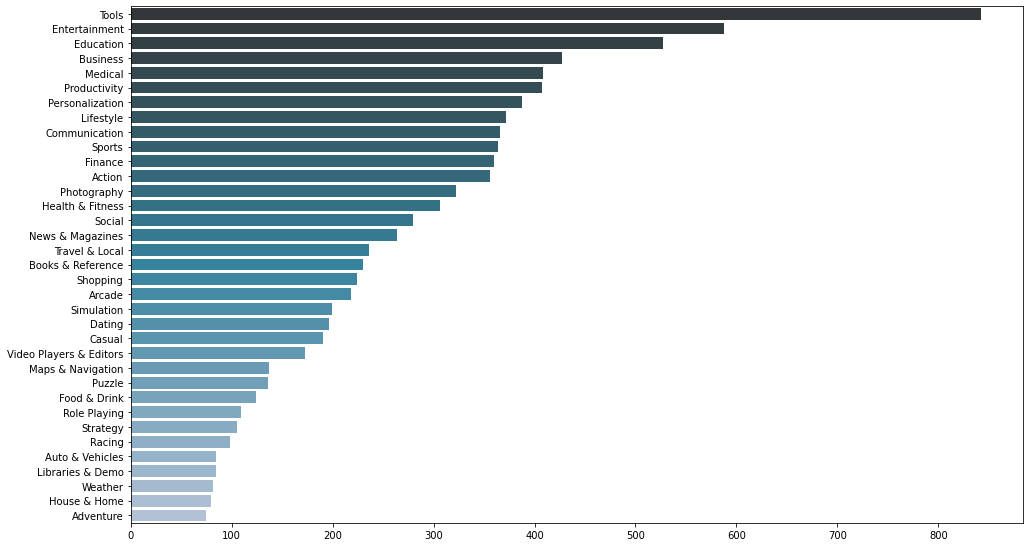

In [15]:
#Show top 35 app genres
plt.figure(figsize=(16, 9.5))
genres = all_data["Genres"].value_counts()[:35]
ax = sns.barplot(x=genres.values, y=genres.index, palette="PuBuGn_d")

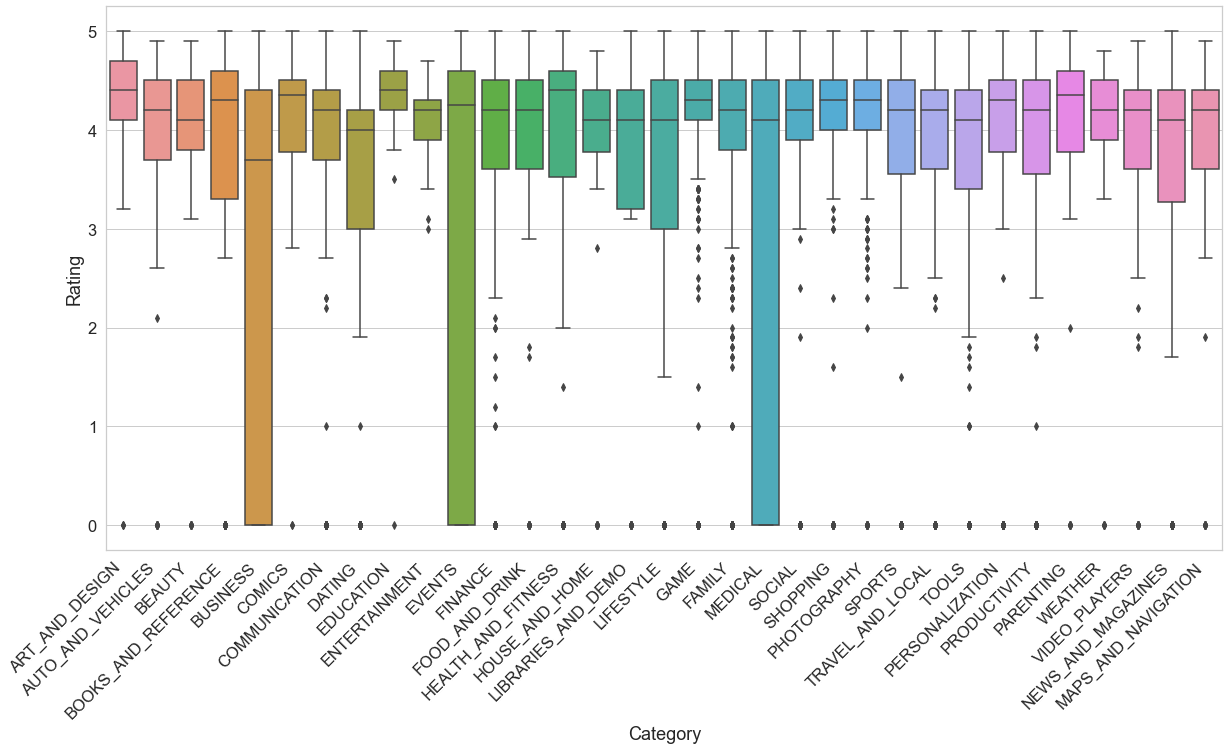

In [16]:
sns.set(rc={'figure.figsize':(20,10)}, font_scale=1.5, style='whitegrid')
ax = sns.boxplot(x="Category",y="Rating",data=all_data)
labels = ax.set_xticklabels(ax.get_xticklabels(), rotation=45,ha='right')

In [17]:
#Cut away rows which have < 4.0 ratings
highRating = all_data.copy()
highRating = highRating.loc[highRating["Rating"] >= 4.0]
highRateNum = highRating.groupby('Category')['Rating'].nunique()
highRateNum
#Categories of concern are auto_and_vehicles and entertainment

Category
ART_AND_DESIGN         10
AUTO_AND_VEHICLES       8
BEAUTY                 10
BOOKS_AND_REFERENCE    11
BUSINESS               11
COMICS                 10
COMMUNICATION          10
DATING                 11
EDUCATION              10
ENTERTAINMENT           8
EVENTS                 11
FAMILY                 11
FINANCE                11
FOOD_AND_DRINK         10
GAME                   11
HEALTH_AND_FITNESS     11
HOUSE_AND_HOME          9
LIBRARIES_AND_DEMO      9
LIFESTYLE              11
MAPS_AND_NAVIGATION    10
MEDICAL                11
NEWS_AND_MAGAZINES     11
PARENTING              11
PERSONALIZATION        11
PHOTOGRAPHY            11
PRODUCTIVITY           11
SHOPPING               10
SOCIAL                 11
SPORTS                 11
TOOLS                  11
TRAVEL_AND_LOCAL       10
VIDEO_PLAYERS          10
WEATHER                 9
Name: Rating, dtype: int64

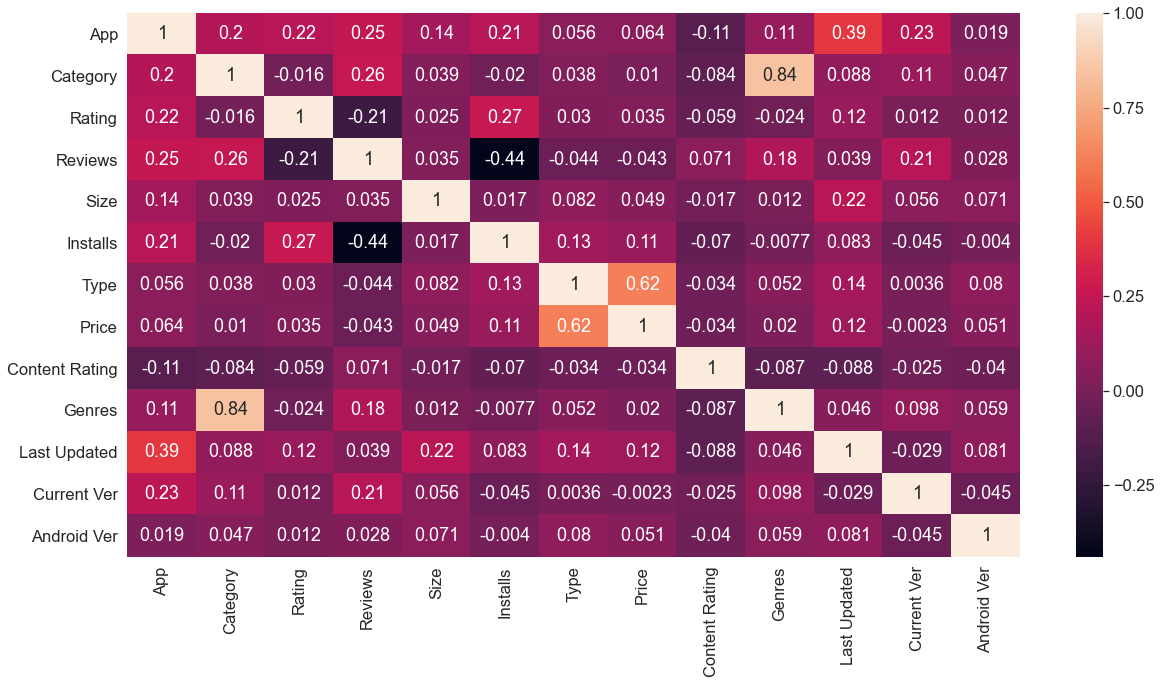

In [18]:
#Analyzing according to ad revenue
all_data.dtypes
all_data["Type"] = (all_data["Type"] == "Paid").astype(int)
corr = all_data.apply(lambda x: x.factorize()[0]).corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True)

In [19]:
#Extract App, Installs, & Content Rating from df_apps
popApps = all_data.copy()
popApps = popApps.drop_duplicates()
#Remove characters preventing values from being floats and integers
popApps["Installs"] = popApps["Installs"].str.replace("+","") 
popApps["Installs"] = popApps["Installs"].str.replace(",","")
popApps["Installs"] = popApps["Installs"].astype("int64")
popApps["Price"] = popApps["Price"].str.replace("$","")
popApps["Price"] = popApps["Price"].astype("float64")
popApps["Size"] = popApps["Size"].str.replace("Varies with device","0")
popApps["Size"] = (popApps["Size"].replace(r'[kM]+$', '', regex=True).astype(float) *\
        popApps["Size"].str.extract(r'[\d\.]+([kM]+)', expand=False).fillna(1).replace(['k','M'], [10**3, 10**6]).astype(int))
popApps["Reviews"] = popApps["Reviews"].astype("int64")

popApps = popApps.sort_values(by="Installs",ascending=False)
popApps.reset_index(inplace=True)
popApps.drop(["index"],axis=1,inplace=True)
popApps.loc[:40,['App','Installs','Content Rating']]

App    Installs Content Rating
0                                   Hangouts  1000000000       Everyone
1                                    YouTube  1000000000           Teen
2                                      Gmail  1000000000       Everyone
3               Google Chrome: Fast & Secure  1000000000       Everyone
4                             Subway Surfers  1000000000   Everyone 10+
5                               Google Drive  1000000000       Everyone
6                              Google Photos  1000000000       Everyone
7                          Google Play Games  1000000000           Teen
8                              Google Photos  1000000000       Everyone
9               Google Chrome: Fast & Secure  1000000000       Everyone
10                            Subway Surfers  1000000000   Everyone 10+
11                             Google Photos  1000000000       Everyone
12                               Google News  1000000000           Teen
13             Skype - free IM & video calls  1000000000       Everyone
14                                  Hangouts  1000000000       Everyone
15                 Maps - Navigate & Explore  1000000000       Everyone
16  Messenger – Text and Video Chat for Free  1000000000       Everyone
17                                  Facebook  1000000000           Teen
18                                  Hangouts  1000000000       Everyone
19                                    Google  1000000000       Everyone
20                                 Instagram  1000000000           Teen
21                                 Instagram  1000000000           Teen
22                                   YouTube  1000000000           Teen
23                                   Google+  1000000000           Teen
24                   Google Play Movies & TV  1000000000           Teen
25                               Google News  1000000000           Teen
26                               Google News  1000000000           Teen
27                         Google Play Games  1000000000           Teen
28                                     Gmail  1000000000       Everyone
29                         Google Play Books  1000000000           Teen
30                            Subway Surfers  1000000000   Everyone 10+
31                            Subway Surfers  1000000000   Everyone 10+
32                              Google Drive  1000000000       Everyone
33                        WhatsApp Messenger  1000000000       Everyone
34                             Google Photos  1000000000       Everyone
35                                 Instagram  1000000000           Teen
36                                   Google+  1000000000           Teen
37                                  Facebook  1000000000           Teen
38                        Google Street View  1000000000       Everyone
39                                    Google  1000000000       Everyone
40                 Maps - Navigate & Explore  1000000000       Everyone

In [20]:
popAppsCopy = popApps.copy()
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Category'. 
popAppsCopy['Category']= label_encoder.fit_transform(popAppsCopy['Category']) 
popAppsCopy['Content Rating']= label_encoder.fit_transform(popAppsCopy['Content Rating']) 
popAppsCopy['Genres']= label_encoder.fit_transform(popAppsCopy['Genres']) 
popAppsCopy.dtypes

App                object
Category            int32
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type                int32
Price             float64
Content Rating      int32
Genres              int32
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [21]:
popAppsCopy = popAppsCopy.drop(["App","Last Updated","Current Ver","Android Ver"],axis=1)
print("There are {} total rows.".format(popAppsCopy.shape[0]))
countPop = popAppsCopy[popAppsCopy["Installs"] > 100000].count()
print("{} Apps are Popular!".format(countPop[0]))
print("{} Apps are Unpopular!\n".format((popAppsCopy.shape[0]-countPop)[0]))
print("For an 80-20 training/test split, we need about {} apps for testing\n".format(popAppsCopy.shape[0]*.20))
popAppsCopy["Installs"] = (popAppsCopy["Installs"] > 100000)*1 #Installs Binarized
print("Cut {} apps off Popular df for a total of 3558 Popular training apps.".format(int(4568*.22132)))
print("Cut {} apps off Unpopular df for a total of 3558 Unpopular training apps.\n".format(int(4324*.17738)))

testPop1 = popAppsCopy[popAppsCopy["Installs"] == 1].sample(1010,random_state=0)
popAppsCopy = popAppsCopy.drop(testPop1.index)
print("Values were not dropped from training dataframe.",testPop1.index[0] in popAppsCopy.index)

testPop0 = popAppsCopy[popAppsCopy["Installs"] == 0].sample(766,random_state=0)
popAppsCopy = popAppsCopy.drop(testPop0.index)
print("Values were not dropped from training dataframe.",testPop0.index[0] in popAppsCopy.index)

testDf = testPop1.append(testPop0)
trainDf = popAppsCopy

#Shuffle rows in test & training data set
testDf = testDf.sample(frac=1,random_state=0).reset_index(drop=True)
trainDf = trainDf.sample(frac=1,random_state=0).reset_index(drop=True)

#Form training and test data split
y_train = trainDf.pop("Installs")
X_train = trainDf.copy()
y_test = testDf.pop("Installs")
X_test = testDf.copy()

X_train = X_train.drop(['Reviews', 'Rating'], axis=1) #REMOVE ROW TO INCLUDE REVIEWS & RATINGS IN ML MODEL ~93% accurate
X_test = X_test.drop(['Reviews', 'Rating'], axis=1)   #REMOVE ROW TO INCLUDE REVIEWS & RATINGS IN ML MODEL ~93% accurate

There are 10357 total rows.
4571 Apps are Popular!
5786 Apps are Unpopular!

For an 80-20 training/test split, we need about 2071.4 apps for testing

Cut 1010 apps off Popular df for a total of 3558 Popular training apps.
Cut 766 apps off Unpopular df for a total of 3558 Unpopular training apps.

Values were not dropped from training dataframe. False
Values were not dropped from training dataframe. False


In [22]:
print("{} Apps are used for Training.".format(y_train.count()))
print("{} Apps are used for Testing.".format(y_test.count()))
X_test.head(3)

8581 Apps are used for Training.
1776 Apps are used for Testing.


Category        Size  Type  Price  Content Rating  Genres
0        14  99000000.0     0   0.00               3       0
1        14   1500000.0     0   0.00               1     118
2        29   1500000.0     1   5.99               1     108

In [23]:
popularity_classifier = DecisionTreeClassifier(max_leaf_nodes=29, random_state=0)
popularity_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=29,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [24]:
predictions = popularity_classifier.predict(X_test)
print("Predicted: ",predictions[:30])
print("Actual:    ",np.array(y_test[:30]))

Predicted:  [1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1]
Actual:     [1 1 0 1 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1]


In [25]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.7150900900900901

In [26]:
X_testCopy = X_test.copy()
X_testCopy["Popular?"] = y_test
X_testCopy[X_test["Size"] == 3600000].head(10)

Category       Size  Type  Price  Content Rating  Genres  Popular?
37          11  3600000.0     0    0.0               1      52         0
339          7  3600000.0     0    0.0               1      38         0
924         11  3600000.0     0    0.0               1      52         0
942         23  3600000.0     0    0.0               1      80         0
1044        29  3600000.0     0    0.0               1     108         1
1088        29  3600000.0     0    0.0               1     108         0
1371        11  3600000.0     0    0.0               1      52         0
1394         2  3600000.0     0    0.0               1      14         0
1470        29  3600000.0     0    0.0               1     108         0
1491         1  3600000.0     0    0.0               1      13         0

In [27]:
import matplotlib as mpl

In [28]:
plt.style.use('dark_background')
mpl.rcParams['text.color'] = 'black'
fig, ax = plt.subplots(figsize=(200, 200), facecolor='k')
plot_tree(popularity_classifier.fit(X_train, y_train, ),filled=True)
plt.show()